In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [3]:
v= TfidfVectorizer()
transformed_output= v.fit_transform(corpus)
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [4]:
dir(v)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_tfidf',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',

In [11]:
all_feature_names= print(v.get_feature_names_out())

['already' 'am' 'amazon' 'and' 'announcing' 'apple' 'are' 'ate' 'biryani'
 'dot' 'eating' 'eco' 'google' 'grapes' 'iphone' 'ironman' 'is' 'loki'
 'microsoft' 'model' 'new' 'pixel' 'pizza' 'surface' 'tesla' 'thor'
 'tomorrow' 'you']


In [14]:
all_feature_names= v.get_feature_names_out()
for word in all_feature_names:
    indx= v.vocabulary_.get(word)
    print(f"{word} {v.idf_[indx]}")

already 2.386294361119891
am 2.386294361119891
amazon 2.386294361119891
and 2.386294361119891
announcing 1.2876820724517808
apple 2.386294361119891
are 2.386294361119891
ate 2.386294361119891
biryani 2.386294361119891
dot 2.386294361119891
eating 1.9808292530117262
eco 2.386294361119891
google 2.386294361119891
grapes 2.386294361119891
iphone 2.386294361119891
ironman 2.386294361119891
is 1.1335313926245225
loki 2.386294361119891
microsoft 2.386294361119891
model 2.386294361119891
new 1.2876820724517808
pixel 2.386294361119891
pizza 2.386294361119891
surface 2.386294361119891
tesla 2.386294361119891
thor 2.386294361119891
tomorrow 1.2876820724517808
you 2.386294361119891


In [15]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [16]:
transformed_output.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

In [17]:
import pandas as pd

df= pd.read_csv("Ecommerce_data.csv")
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [18]:
df.label.value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

In [26]:
df['label_num']=df.label.map({'Household':0, 'Electronics':1, 'Clothing & Accessories':2, 'Books':3  })

In [27]:
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


<AxesSubplot:xlabel='label_num', ylabel='count'>

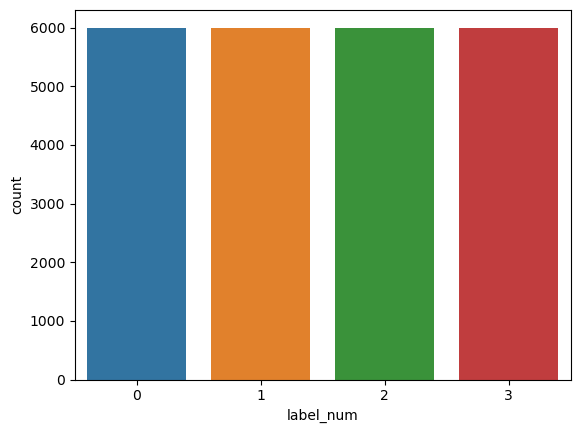

In [41]:
import seaborn as sns
df.label_num.value_counts()
sns.countplot(data=df, x="label_num")

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(df.Text, df.label_num, random_state=2022, stratify=df.label_num)

In [45]:
y_train.value_counts()

2    4500
0    4500
1    4500
3    4500
Name: label_num, dtype: int64

In [46]:
y_test.value_counts()

1    1500
0    1500
3    1500
2    1500
Name: label_num, dtype: int64

In [48]:
X_train.shape, X_test.shape

((18000,), (6000,))

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf= Pipeline([
    ('tf_idf_vectorizer', TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())  
])

clf.fit(X_train, y_train)

y_pred= clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1500
           1       0.96      0.97      0.96      1500
           2       0.97      0.98      0.97      1500
           3       0.97      0.94      0.96      1500

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



In [57]:
y_pred[:5]

array([1, 1, 0, 1, 3], dtype=int64)

In [52]:
from sklearn.naive_bayes import MultinomialNB


clf= Pipeline([
    ('tf_idf_vectorizer', TfidfVectorizer()),
     ('NB', MultinomialNB())  
])

clf.fit(X_train, y_train)

y_pred= clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1500
           1       0.96      0.97      0.96      1500
           2       0.97      0.98      0.98      1500
           3       0.98      0.93      0.95      1500

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



In [54]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1500
           1       0.98      0.97      0.97      1500
           2       0.98      0.98      0.98      1500
           3       0.98      0.97      0.97      1500

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



In [55]:
import spacy

nlp= spacy.load("en_core_web_sm")

def preprocess(text):
    doc= nlp(text)
    
    filtered_tokens= []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join( filtered_tokens)

In [56]:
df['preprocessed_text']= df['Text'].apply(preprocess)

In [58]:
df.head()

,Text,label,label_num,preprocessed_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2,Indira Designer Women Art Mysore Silk Saree Bl...


In [59]:
X_train, X_test, y_train, y_test= train_test_split(df.preprocessed_text, df.label_num, random_state=2022, stratify=df.label_num)

In [60]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1500
           1       0.97      0.98      0.98      1500
           2       0.98      0.99      0.99      1500
           3       0.98      0.97      0.98      1500

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000

